In [1]:
!pip install requests pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


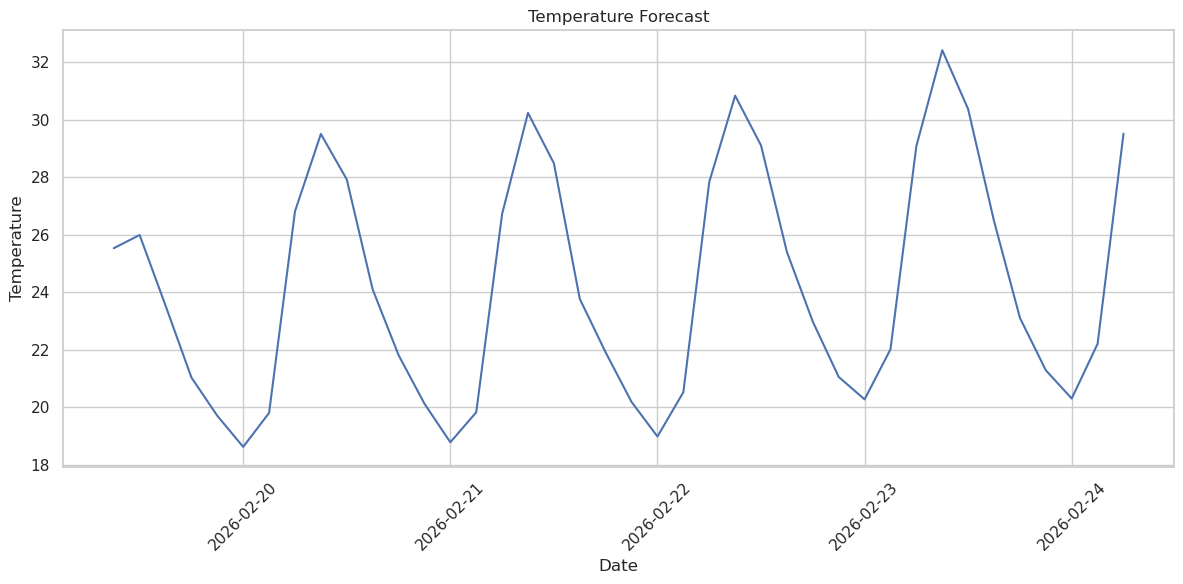

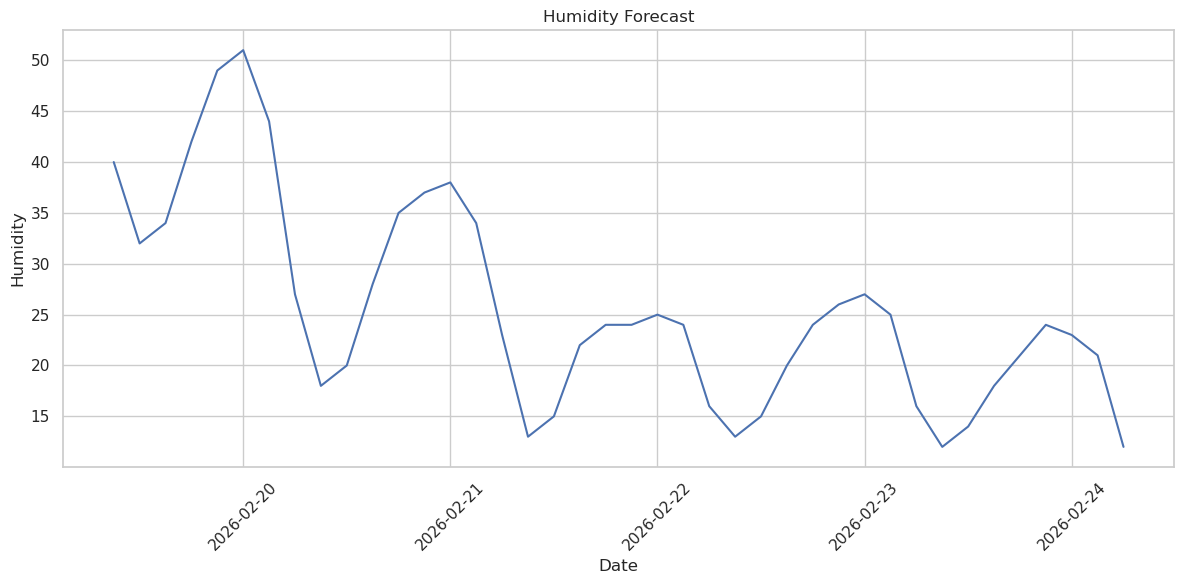

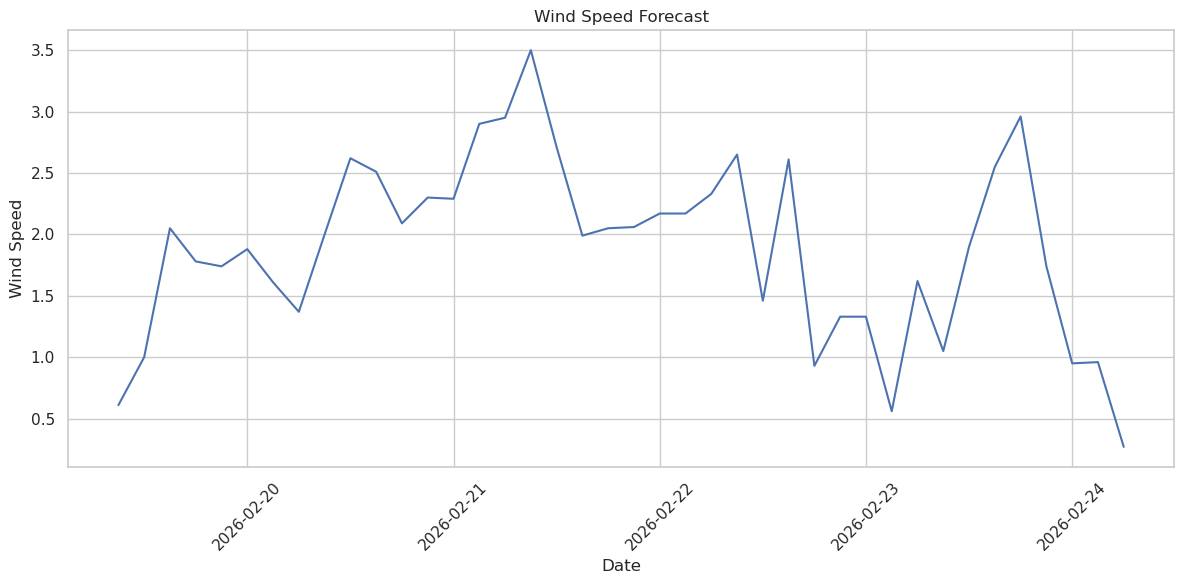

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = "5ac796a2a5dadab5fdd5773f264d1eb6"
CITY = "Delhi"

# API URL
url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(url)
data = response.json()

# Extract data
dates = []
temperatures = []
humidity = []
wind_speed = []

for item in data['list']:
    dates.append(item['dt_txt'])
    temperatures.append(item['main']['temp'])
    humidity.append(item['main']['humidity'])
    wind_speed.append(item['wind']['speed'])

# Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Wind Speed": wind_speed
})

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Visualization
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Temperature", data=df)
plt.xticks(rotation=45)
plt.title("Temperature Forecast")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Humidity", data=df)
plt.xticks(rotation=45)
plt.title("Humidity Forecast")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Wind Speed", data=df)
plt.xticks(rotation=45)
plt.title("Wind Speed Forecast")
plt.tight_layout()
plt.show()

